#Instalando e importando as bibliotecas necessárias

In [ ]:
# Se necessário, instale o pacote skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Preparando as variáveis para o problema

In [ ]:
# Cria as variáveis do problema
pessoas = ctrl.Antecedent(np.arange(0, 61, 1), 'pessoas') #pessoas com o universo de 0 a 60
automoveis = ctrl.Antecedent(np.arange(0, 31, 1), 'automoveis')#automoveis com o universo de 0 a 30
area = ctrl.Antecedent(np.arange(0, 7, 1), 'area')#pista com o universo de 0 a 6

fluxo = ctrl.Consequent(np.arange(0, 101, 1), 'fluxo')#pista com o universo de 0 a 100

## Cria as funções de pertinência usando funções gaussianas e triangulares

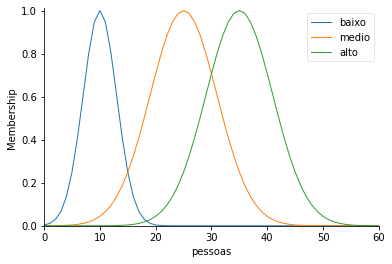

In [ ]:
# Os intervalos de pessoas são baixo, médio, alto, em relação ao número de pessoas

pessoas['baixo'] = fuzz.gaussmf(pessoas.universe, 10, 3)
pessoas['medio'] = fuzz.gaussmf(pessoas.universe, 25, 6)
pessoas['alto'] = fuzz.gaussmf(pessoas.universe, 35, 6)
pessoas.view()

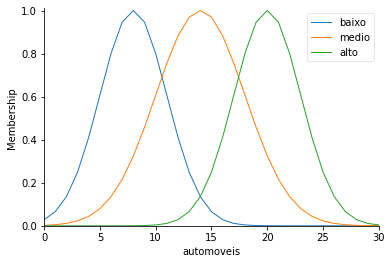

In [ ]:
automoveis['baixo'] = fuzz.gaussmf(automoveis.universe, 8, 3)
automoveis['medio'] = fuzz.gaussmf(automoveis.universe, 14, 4)
automoveis['alto'] = fuzz.gaussmf(automoveis.universe, 20, 3)
automoveis.view()

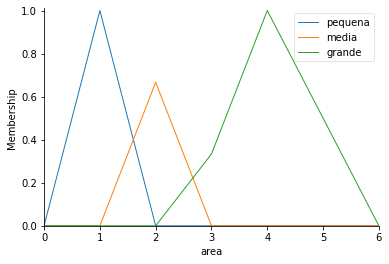

In [ ]:
area['pequena'] = fuzz.trimf(area.universe, [0, 1, 1.5])
area['media'] = fuzz.trimf(area.universe, [1, 2.5, 3])
area['grande'] = fuzz.trimf(area.universe, [2.5, 4, 6])
area.view()

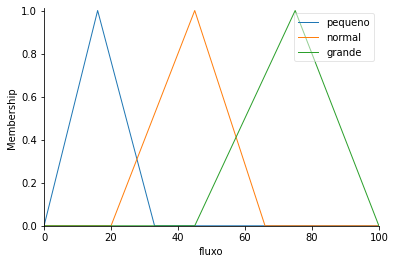

In [ ]:
fluxo['pequeno'] = fuzz.trimf(fluxo.universe, [0, 16, 33])
fluxo['normal'] = fuzz.trimf(fluxo.universe, [20, 45, 66])
fluxo['grande'] = fuzz.trimf(fluxo.universe, [45, 75, 100])
fluxo.view()

#Fazendo as regras de controle

In [ ]:
rule1 = ctrl.Rule(pessoas['baixo'] & automoveis['baixo'] & area['pequena'], fluxo['pequeno'])
rule2 = ctrl.Rule(pessoas['medio'] & automoveis['baixo'] & area['pequena'], fluxo['pequeno'])
rule3 = ctrl.Rule(pessoas['alto'] & automoveis['baixo'] & area['pequena'], fluxo['normal'])
rule4 = ctrl.Rule(pessoas['baixo'] & automoveis['medio'] & area['pequena'], fluxo['normal'])
rule5 = ctrl.Rule(pessoas['baixo'] & automoveis['alto'] & area['pequena'], fluxo['normal'])
rule6 = ctrl.Rule(pessoas['medio'] & automoveis['medio'] & area['pequena'], fluxo['normal'])
rule7 = ctrl.Rule(pessoas['medio'] & automoveis['alto'] & area['pequena'], fluxo['grande'])
rule8 = ctrl.Rule(pessoas['alto'] & automoveis['medio'] & area['pequena'], fluxo['pequeno'])
rule9 = ctrl.Rule(pessoas['alto'] & automoveis['alto'] & area['pequena'], fluxo['grande'])

rule11 = ctrl.Rule(pessoas['baixo'] & automoveis['baixo'] & area['media'], fluxo['pequeno'])
rule12 = ctrl.Rule(pessoas['medio'] & automoveis['baixo'] & area['media'], fluxo['pequeno'])
rule13 = ctrl.Rule(pessoas['alto'] & automoveis['baixo'] & area['media'], fluxo['normal'])
rule14 = ctrl.Rule(pessoas['baixo'] & automoveis['medio'] & area['media'], fluxo['pequeno'])
rule15 = ctrl.Rule(pessoas['baixo'] & automoveis['alto'] & area['media'], fluxo['normal'])
rule16 = ctrl.Rule(pessoas['medio'] & automoveis['medio'] & area['media'], fluxo['normal'])
rule17 = ctrl.Rule(pessoas['medio'] & automoveis['alto'] & area['media'], fluxo['normal'])
rule18 = ctrl.Rule(pessoas['alto'] & automoveis['medio'] & area['media'], fluxo['grande'])
rule19 = ctrl.Rule(pessoas['alto'] & automoveis['alto'] & area['media'], fluxo['grande'])

rule21 = ctrl.Rule(pessoas['baixo'] & automoveis['baixo'] & area['grande'], fluxo['pequeno'])
rule22 = ctrl.Rule(pessoas['medio'] & automoveis['baixo'] & area['grande'], fluxo['pequeno'])
rule23 = ctrl.Rule(pessoas['alto'] & automoveis['baixo'] & area['grande'], fluxo['pequeno'])
rule24 = ctrl.Rule(pessoas['baixo'] & automoveis['medio'] & area['grande'], fluxo['pequeno'])
rule25 = ctrl.Rule(pessoas['baixo'] & automoveis['alto'] & area['grande'], fluxo['normal'])
rule26 = ctrl.Rule(pessoas['medio'] & automoveis['medio'] & area['grande'], fluxo['normal'])
rule27 = ctrl.Rule(pessoas['medio'] & automoveis['alto'] & area['grande'], fluxo['normal'])
rule28 = ctrl.Rule(pessoas['alto'] & automoveis['medio'] & area['grande'], fluxo['grande'])
rule29 = ctrl.Rule(pessoas['alto'] & automoveis['alto'] & area['grande'], fluxo['grande'])

In [ ]:
fluxo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29])

In [ ]:
fluxo_simulador = ctrl.ControlSystemSimulation(fluxo_ctrl)

#Fazendo a aplicação do modelo Fuzzy

In [ ]:
pessoas_input = 0
automoveis_input = 0
area_input = 0
pessoas_input = int(input('Qual o número de pessoas que foram identificadas? (Até 60 pessoas) '))
automoveis_input = int(input('Qual o número de pessoas que foram automóveis? (Até 30 automóveis) '))
area_input = int(input('Qual o tamanho da area do local? (Usar números inteiros entre 1 a 6) '))

Qual o número de pessoas que foram identificadas? (Até 60 pessoas) 30
Qual o número de pessoas que foram automóveis? (Até 30 automóveis) 30
Qual o tamanho da area do local? (Usar números inteiros entre 1 a 6) 4


In [ ]:
fluxo_simulador.input['pessoas'] = pessoas_input
fluxo_simulador.input['automoveis'] = automoveis_input
fluxo_simulador.input['area'] = area_input

In [ ]:
# Computando o resultado
fluxo_simulador.compute()
print(fluxo_simulador.output['fluxo'])

59.99999927551131


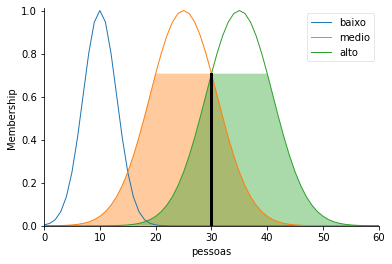

In [ ]:
pessoas.view(sim=fluxo_simulador)

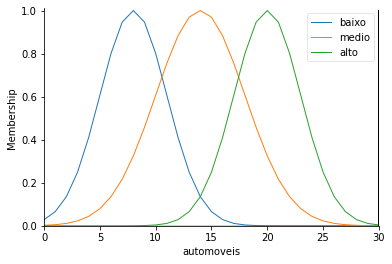

In [ ]:
automoveis.view(sim=fluxo_simulador)

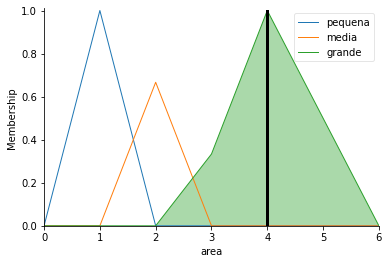

In [ ]:
area.view(sim=fluxo_simulador)

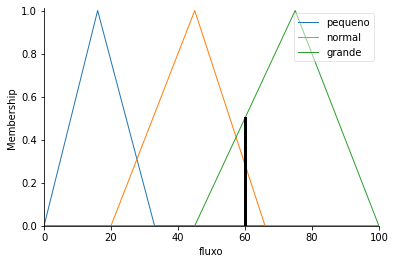

In [ ]:
fluxo.view(sim=fluxo_simulador)